In [1]:
import requests
import config
from bs4 import BeautifulSoup as BS
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [92]:
pip install mord

  Created wheel for mord: filename=mord-0.6-cp37-none-any.whl size=6008 sha256=37035120b06b45d2a15438d6d7e7105a91d53de49e4467a7b809b1287a2ae689
  Stored in directory: /Users/andrewtriola/Library/Caches/pip/wheels/98/14/b2/244c2cec93a0c6edb29b488bd6b2710ded7e9d457033b86366
Successfully built mord
Note: you may need to restart the kernel to use updated packages.


In [2]:
cnx = mysql.connector.connect(
  host=config.hostj,
  user=config.userj,
  passwd=config.pwj,
  database = 'nfl_draft_info')

cursor = cnx.cursor()

In [3]:
df_drafted = pd.read_csv("df_drafted.csv")

In [4]:
df_drafted.shape

(4247, 12)

In [5]:
db_df = df_drafted[(df_drafted['position'] == 'CB') |
                  (df_drafted['position'] == 'FS') |
                  (df_drafted['position'] == 'SS') |
                  (df_drafted['position'] == 'S') |
                  (df_drafted['position'] == 'DB')]
db_df.head()

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
3,5,Rashard Anderson,2000,CB,Jackson St.,74.0,206,4.55,34.0,NaN,4.15,23.0
5,10,Reggie Austin,2000,CB,Wake Forest,69.0,175,4.44,35.0,17.0,4.14,125.0
7,13,Rashidi Barnes,2000,FS,Colorado,72.0,208,4.62,35.0,10.0,4.32,225.0
8,14,David Barrett,2000,CB,Arkansas,70.0,199,4.44,37.5,16.0,4.04,102.0
9,15,William Bartee,2000,CB,Oklahoma,73.0,192,4.43,38.5,NaN,3.99,54.0


In [6]:
ol_df = df_drafted[(df_drafted['position'] == 'OT') |
                  (df_drafted['position'] == 'OG') |
                  (df_drafted['position'] == 'C') |
                  (df_drafted['position'] == 'OL')]
ol_df.head()

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
2,3,Darnell Alford,2000,OT,Boston Col.,76.0,334,5.56,25.0,23.0,4.98,188.0
6,12,Mark Baniewicz,2000,OT,Syracuse,78.0,312,5.34,28.0,20.0,4.73,247.0
13,22,Brad Bedell,2000,OG,Colorado,76.0,302,5.07,31.5,17.0,4.58,206.0
26,43,Cooper Carlisle,2000,OG,Florida,77.0,297,5.16,31.0,28.0,4.48,112.0
32,52,Joey Chustz,2000,OT,Louisiana Tech,79.0,304,5.08,31.0,28.0,4.65,123.0


In [7]:
dl_df = df_drafted[(df_drafted['position'] == 'DE') |
                  (df_drafted['position'] == 'DT') |
                  (df_drafted['position'] == 'DL')]
dl_df.head()

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
16,25,Michael Boireau,2000,DE,Miami (FL),76.0,274,5.09,29.0,26.0,4.49,56.0
21,35,Courtney Brown,2000,DE,Penn St.,77.0,269,4.78,NaN,NaN,NaN,1.0
28,45,Leonardo Carson,2000,DE,Auburn,73.0,283,5.06,28.0,22.0,4.75,113.0
33,55,Kendrick Clancy,2000,DT,Mississippi,73.0,283,5.25,27.5,25.0,4.65,72.0
40,63,Chris Combs,2000,DT,Duke,77.0,286,5.16,NaN,22.0,NaN,173.0


In [8]:
lb_df = df_drafted[(df_drafted['position'] == 'OLB') |
                  (df_drafted['position'] == 'ILB') |
                  (df_drafted['position'] == 'EDGE') |
                  (df_drafted['position'] == 'LB')]
lb_df.head()

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
0,1,John Abraham,2000,OLB,South Carolina,76.0,252,4.55,NaN,NaN,NaN,13.0
4,7,LaVar Arrington,2000,OLB,Penn St.,75.0,250,4.53,NaN,NaN,NaN,2.0
14,23,Marcus Bell,2000,ILB,Arizona,74.0,237,4.78,31.5,21.0,4.33,116.0
23,38,Keith Bulluck,2000,OLB,Syracuse,75.0,244,4.47,38.0,NaN,4.13,30.0
35,57,Danny Clark,2000,ILB,Illinois,74.0,245,4.75,NaN,20.0,NaN,245.0


In [9]:
st_df = df_drafted[(df_drafted['position'] == 'K') |
                  (df_drafted['position'] == 'P') |
                  (df_drafted['position'] == 'LS')]
st_df.head()

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
85,153,Sebastian Janikowski,2000,K,Florida St.,73.0,260,NaN,NaN,NaN,NaN,17.0
100,184,Shane Lechler,2000,P,Texas A&M,74.0,234,NaN,NaN,NaN,NaN,142.0
277,439,Nick Harris,2001,P,California,74.0,221,NaN,NaN,NaN,NaN,120.0
310,492,David Leaverton,2001,P,Tennessee,75.0,211,NaN,NaN,NaN,NaN,142.0
349,550,Owen Pochman,2001,K,BYU,71.0,179,NaN,NaN,NaN,NaN,216.0


In [10]:
back_df = df_drafted[(df_drafted['position'] == 'RB') |
                    (df_drafted['position'] == 'FB') |
                    (df_drafted['position'] == 'WR') |
                    (df_drafted['position'] == 'TE')]
back_df.head()

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
1,2,Shaun Alexander,2000,RB,Alabama,72.0,218,4.58,NaN,NaN,NaN,19.0
11,19,Anthony Becht,2000,TE,West Virginia,78.0,270,4.78,33.5,NaN,4.08,27.0
24,40,Plaxico Burress,2000,WR,Michigan St.,77.0,231,4.59,33.0,NaN,NaN,8.0
25,42,Trung Canidate,2000,RB,Arizona,71.0,193,4.41,NaN,18.0,NaN,31.0
30,49,Doug Chapman,2000,RB,Marshall,70.0,215,4.56,38.5,16.0,4.20,88.0


In [11]:
qb_df = df_drafted[(df_drafted['position'] == 'QB')]
qb_df.head()

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
18,28,Tom Brady,2000,QB,Michigan,76.0,211,5.28,24.5,NaN,4.38,199.0
22,37,Marc Bulger,2000,QB,West Virginia,74.0,208,4.97,NaN,NaN,4.34,168.0
27,44,Giovanni Carmazzi,2000,QB,Hofstra,75.0,224,4.74,36.5,NaN,4.23,65.0
70,126,Joe Hamilton,2000,QB,Georgia Tech,70.0,192,4.81,NaN,NaN,NaN,234.0
79,143,Todd Husak,2000,QB,Stanford,75.0,216,5.20,27.5,NaN,4.41,202.0


In [12]:
def columns_to_float(df, column_list):

    for c in column_list:
        df[c] = df[c].astype(float)
    return df

In [13]:
db_numbers = db_df.loc[:, ['height', 'weight', 'forty', 'vertical', 'bench', 'shuttle']]
#print(df_numbers)
db_numbers = columns_to_float(db_numbers,['height', 'weight', 'forty','vertical', 'bench', 'shuttle'])
print(db_numbers.dtypes)

height      float64
weight      float64
forty       float64
vertical    float64
bench       float64
shuttle     float64
dtype: object


In [14]:
ol_numbers = ol_df.loc[:, ['height', 'weight', 'forty', 'vertical', 'bench', 'shuttle']]
#print(df_numbers)
ol_numbers = columns_to_float(ol_numbers,['height', 'weight', 'forty','vertical', 'bench', 'shuttle'])
#print(db_numbers.dtypes)

In [15]:
dl_numbers = dl_df.loc[:, ['height', 'weight', 'forty', 'vertical', 'bench', 'shuttle']]
#print(df_numbers)
dl_numbers = columns_to_float(dl_numbers,['height', 'weight', 'forty','vertical', 'bench', 'shuttle'])
#print(db_numbers.dtypes)

In [16]:
lb_numbers = lb_df.loc[:, ['height', 'weight', 'forty', 'vertical', 'bench', 'shuttle']]
#print(df_numbers)
lb_numbers = columns_to_float(lb_numbers,['height', 'weight', 'forty','vertical', 'bench', 'shuttle'])
#print(db_numbers.dtypes)

In [17]:
st_numbers = st_df.loc[:, ['height', 'weight', 'forty', 'vertical', 'bench', 'shuttle']]
#print(df_numbers)
st_numbers = columns_to_float(st_numbers,['height', 'weight', 'forty','vertical', 'bench', 'shuttle'])
#print(db_numbers.dtypes)

In [18]:
back_numbers = back_df.loc[:, ['height', 'weight', 'forty', 'vertical', 'bench', 'shuttle']]
#print(df_numbers)
back_numbers = columns_to_float(back_numbers,['height', 'weight', 'forty','vertical', 'bench', 'shuttle'])
#print(db_numbers.dtypes)

In [19]:
qb_numbers = qb_df.loc[:, ['height', 'weight', 'forty', 'vertical', 'bench', 'shuttle']]
#print(df_numbers)
qb_numbers = columns_to_float(qb_numbers,['height', 'weight', 'forty','vertical', 'bench', 'shuttle'])
#print(db_numbers.dtypes)

In [89]:
df_drafted.head()

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
0,1,John Abraham,2000,OLB,South Carolina,76.0,252,4.55,NaN,NaN,NaN,13.0
1,2,Shaun Alexander,2000,RB,Alabama,72.0,218,4.58,NaN,NaN,NaN,19.0
2,3,Darnell Alford,2000,OT,Boston Col.,76.0,334,5.56,25.0,23.0,4.98,188.0
3,5,Rashard Anderson,2000,CB,Jackson St.,74.0,206,4.55,34.0,NaN,4.15,23.0
4,7,LaVar Arrington,2000,OLB,Penn St.,75.0,250,4.53,NaN,NaN,NaN,2.0


In [32]:
df_drafted_pred = df_drafted.iloc[:,3:11]
df_drafted_pred = df_drafted_pred.drop(columns=['school'])
df_drafted_pred.head()

,position,height,weight,forty,vertical,bench,shuttle
0,OLB,76.0,252,4.55,NaN,NaN,NaN
1,RB,72.0,218,4.58,NaN,NaN,NaN
2,OT,76.0,334,5.56,25.0,23.0,4.98
3,CB,74.0,206,4.55,34.0,NaN,4.15
4,OLB,75.0,250,4.53,NaN,NaN,NaN


In [101]:
#df_nonull = df_drafted.dropna()
#df_drafted_nonull = df_nonull.iloc[:,5:11]
#df_drafted_nonull.head()
df_nonull.head()

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
2,3,Darnell Alford,2000,OT,Boston Col.,76.0,334,5.56,25.0,23.0,4.98,188.0
5,10,Reggie Austin,2000,CB,Wake Forest,69.0,175,4.44,35.0,17.0,4.14,125.0
6,12,Mark Baniewicz,2000,OT,Syracuse,78.0,312,5.34,28.0,20.0,4.73,247.0
7,13,Rashidi Barnes,2000,FS,Colorado,72.0,208,4.62,35.0,10.0,4.32,225.0
8,14,David Barrett,2000,CB,Arkansas,70.0,199,4.44,37.5,16.0,4.04,102.0


In [34]:
corr1 = df_drafted_pred.corr()
corr1

,height,weight,forty,vertical,bench,shuttle
height,1.000000,0.717320,0.624152,-0.425056,0.386995,0.535994
weight,0.717320,1.000000,0.872372,-0.641309,0.652206,0.783583
forty,0.624152,0.872372,1.000000,-0.737618,0.498783,0.781401
vertical,-0.425056,-0.641309,-0.737618,1.000000,-0.345347,-0.683277
bench,0.386995,0.652206,0.498783,-0.345347,1.000000,0.431305
shuttle,0.535994,0.783583,0.781401,-0.683277,0.431305,1.000000


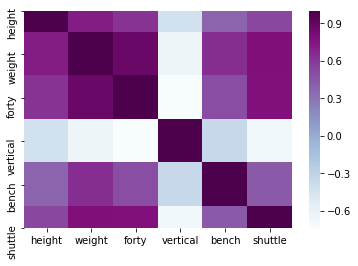

In [36]:
sns.heatmap(corr1, cmap = "BuPu")

In [37]:
### get dummies for position ###

In [38]:
### multiple regression by position ###

In [47]:
qb_df = qb_df.set_index('row_id')
db_df = db_df.set_index('row_id')
ol_df = ol_df.set_index('row_id')
dl_df = dl_df.set_index('row_id')
back_df = back_df.set_index('row_id')
st_df = st_df.set_index('row_id')
lb_df = lb_df.set_index('row_id')

In [49]:
qb_df = qb_df.drop(columns=['school', 'player', 'position'])
db_df = db_df.drop(columns=['school', 'player', 'position'])
ol_df = ol_df.drop(columns=['school', 'player', 'position'])
dl_df = dl_df.drop(columns=['school', 'player', 'position'])
back_df = back_df.drop(columns=['school', 'player', 'position'])
st_df = st_df.drop(columns=['school', 'player', 'position'])
lb_df = lb_df.drop(columns=['school', 'player', 'position'])

In [51]:
corr_qb1 = qb_df.corr()
corr_qb1

,year,height,weight,forty,vertical,bench,shuttle,pick_number
year,1.000000,0.102296,0.018801,0.007436,-0.136566,-0.049950,0.062866,-0.079857
height,0.102296,1.000000,0.607759,0.286797,-0.198389,-0.338540,0.326418,-0.179164
weight,0.018801,0.607759,1.000000,0.219455,-0.059945,-0.144095,0.198954,-0.204878
forty,0.007436,0.286797,0.219455,1.000000,-0.655919,-0.423219,0.503469,0.169338
vertical,-0.136566,-0.198389,-0.059945,-0.655919,1.000000,0.500000,-0.478767,-0.207498
bench,-0.049950,-0.338540,-0.144095,-0.423219,0.500000,1.000000,-0.812309,-0.306282
shuttle,0.062866,0.326418,0.198954,0.503469,-0.478767,-0.812309,1.000000,0.137842
pick_number,-0.079857,-0.179164,-0.204878,0.169338,-0.207498,-0.306282,0.137842,1.000000


In [53]:
abs(corr_qb1).sort_values(by = 'pick_number',  ascending= False)['pick_number']

pick_number    1.000000
bench          0.306282
vertical       0.207498
weight         0.204878
height         0.179164
forty          0.169338
shuttle        0.137842
year           0.079857
Name: pick_number, dtype: float64

In [59]:
qb_reg_simple = ols(formula= "pick_number~weight+height+vertical+forty+shuttle+year", data=qb_df).fit()
qb_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pick_number   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3.586
Date:                Tue, 14 Jan 2020   Prob (F-statistic):            0.00240
Time:                        14:16:22   Log-Likelihood:                -875.24
No. Observations:                 154   AIC:                             1764.
Df Residuals:                     147   BIC:                             1786.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3876.3769   2123.618      1.825      0.070    -320.388    8073.142
weight        -1.0077      0.764     -1.319      0.189      -2.518       0.502
height        -7.0691      5.007     -1.412      0.160     -16.964       2.826
vertical      -2.5321      2.519     -1.005      0.316      -7.511       2.446
forty         61.2899     47.071      1.302      0.195     -31.734     154.314
shuttle       51.8105     44.176      1.173      0.243     -35.492     139.113
year          -1.7139      1.035     -1.656      0.100      -3.759       0.332
==============================================================================
Omnibus:                       19.099   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.726
Skew:                           0.022   Prob(JB):                       0.0571
Kurtosis:                       2.056   Cond. No.                     7.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
corr_db1 = db_df.corr()
corr_db1

,year,height,weight,forty,vertical,bench,shuttle,pick_number
year,1.000000,0.105940,0.019312,-0.082742,-0.103223,0.005911,0.139950,-0.010897
height,0.105940,1.000000,0.559526,0.178540,0.031276,0.047799,0.028413,-0.013760
weight,0.019312,0.559526,1.000000,0.261862,-0.006688,0.356563,0.057948,-0.013380
forty,-0.082742,0.178540,0.261862,1.000000,-0.258653,-0.071475,0.168741,0.336520
vertical,-0.103223,0.031276,-0.006688,-0.258653,1.000000,0.012234,-0.274921,-0.206356
bench,0.005911,0.047799,0.356563,-0.071475,0.012234,1.000000,-0.023963,-0.025108
shuttle,0.139950,0.028413,0.057948,0.168741,-0.274921,-0.023963,1.000000,0.204068
pick_number,-0.010897,-0.013760,-0.013380,0.336520,-0.206356,-0.025108,0.204068,1.000000


In [61]:
abs(corr_db1).sort_values(by = 'pick_number',  ascending= False)['pick_number']

pick_number    1.000000
forty          0.336520
vertical       0.206356
shuttle        0.204068
bench          0.025108
height         0.013760
weight         0.013380
year           0.010897
Name: pick_number, dtype: float64

In [63]:
db_reg_simple = ols(formula= "pick_number~forty+vertical+shuttle", data=db_df).fit()
db_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pick_number   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     27.88
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           1.17e-16
Time:                        14:20:42   Log-Likelihood:                -2722.7
No. Observations:                 492   AIC:                             5453.
Df Residuals:                     488   BIC:                             5470.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -921.3369    169.310     -5.442      0.000   -1254.003    -588.671
forty        203.8387     31.170      6.540      0.000     142.595     265.082
vertical      -3.0146      1.055     -2.858      0.004      -5.087      -0.942
shuttle       54.8218     19.830      2.765      0.006      15.860      93.784
==============================================================================
Omnibus:                       23.343   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.107
Skew:                           0.231   Prob(JB):                      0.00143
Kurtosis:                       2.348   Cond. No.                     2.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
corr_ol1 = ol_df.corr()
corr_ol1

,year,height,weight,forty,vertical,bench,shuttle,pick_number
year,1.000000,0.061925,-0.075148,-0.096958,-0.180435,-0.031725,0.105079,-0.090947
height,0.061925,1.000000,0.288217,0.032830,0.037100,-0.198109,0.130294,-0.053906
weight,-0.075148,0.288217,1.000000,0.380352,-0.187096,0.049596,0.444120,-0.059578
forty,-0.096958,0.032830,0.380352,1.000000,-0.402538,-0.226541,0.415740,0.258263
vertical,-0.180435,0.037100,-0.187096,-0.402538,1.000000,0.139768,-0.373179,-0.178133
bench,-0.031725,-0.198109,0.049596,-0.226541,0.139768,1.000000,-0.102656,-0.119593
shuttle,0.105079,0.130294,0.444120,0.415740,-0.373179,-0.102656,1.000000,0.097152
pick_number,-0.090947,-0.053906,-0.059578,0.258263,-0.178133,-0.119593,0.097152,1.000000


In [65]:
corr_dl1 = dl_df.corr()
corr_dl1

,year,height,weight,forty,vertical,bench,shuttle,pick_number
year,1.000000,0.050016,0.051199,0.025521,-0.105166,0.012158,0.118081,0.004356
height,0.050016,1.000000,-0.155525,-0.217412,0.178101,-0.232191,-0.196126,-0.086536
weight,0.051199,-0.155525,1.000000,0.744033,-0.592361,0.395443,0.613876,-0.048950
forty,0.025521,-0.217412,0.744033,1.000000,-0.654087,0.168402,0.581787,0.164451
vertical,-0.105166,0.178101,-0.592361,-0.654087,1.000000,-0.054667,-0.578424,-0.067896
bench,0.012158,-0.232191,0.395443,0.168402,-0.054667,1.000000,0.117286,-0.144005
shuttle,0.118081,-0.196126,0.613876,0.581787,-0.578424,0.117286,1.000000,0.059521
pick_number,0.004356,-0.086536,-0.048950,0.164451,-0.067896,-0.144005,0.059521,1.000000


In [66]:
corr_st1 = st_df.corr()
corr_st1

,year,height,weight,forty,vertical,bench,shuttle,pick_number
year,1.000000,-0.045099,-0.120185,-0.174489,0.204996,0.485568,0.981981,0.181324
height,-0.045099,1.000000,0.533290,0.208127,-0.213834,0.322574,0.654654,0.078045
weight,-0.120185,0.533290,1.000000,0.318141,-0.654525,0.569335,-0.587258,0.056220
forty,-0.174489,0.208127,0.318141,1.000000,-0.664122,-0.204596,-0.679934,0.244110
vertical,0.204996,-0.213834,-0.654525,-0.664122,1.000000,0.986082,0.371154,-0.715101
bench,0.485568,0.322574,0.569335,-0.204596,0.986082,1.000000,NaN,-0.285036
shuttle,0.981981,0.654654,-0.587258,-0.679934,0.371154,NaN,1.000000,-0.314141
pick_number,0.181324,0.078045,0.056220,0.244110,-0.715101,-0.285036,-0.314141,1.000000


In [67]:
abs(corr_st1).sort_values(by = 'pick_number',  ascending= False)['pick_number']

pick_number    1.000000
vertical       0.715101
shuttle        0.314141
bench          0.285036
forty          0.244110
year           0.181324
height         0.078045
weight         0.056220
Name: pick_number, dtype: float64

In [77]:
st_reg_simple = ols(formula= "pick_number~forty+year+height+weight", data=st_df).fit()
st_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pick_number   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.963
Date:                Tue, 14 Jan 2020   Prob (F-statistic):              0.115
Time:                        14:28:18   Log-Likelihood:                -282.44
No. Observations:                  54   AIC:                             574.9
Df Residuals:                      49   BIC:                             584.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2577.6271   2667.013     -0.966      0.339   -7937.191    2781.937
forty         55.5896     41.484      1.340      0.186     -27.775     138.954
year           1.2667      1.307      0.969      0.337      -1.361       3.894
height        -3.6087      4.259     -0.847      0.401     -12.167       4.950
weight         0.8920      0.480      1.858      0.069      -0.073       1.856
==============================================================================
Omnibus:                        1.071   Durbin-Watson:                   2.557
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                0.894
Skew:                          -0.310   Prob(JB):                        0.639
Kurtosis:                       2.885   Cond. No.                     8.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
corr_back1 = back_df.corr()
corr_back1

,year,height,weight,forty,vertical,bench,shuttle,pick_number
year,1.000000,-0.003863,-0.028629,-0.066043,-0.034776,-0.278948,0.125161,0.045747
height,-0.003863,1.000000,0.661315,0.426699,-0.084766,0.092961,0.261845,-0.044665
weight,-0.028629,0.661315,1.000000,0.698784,-0.258423,0.477867,0.417519,0.023582
forty,-0.066043,0.426699,0.698784,1.000000,-0.429830,0.249821,0.382105,0.246749
vertical,-0.034776,-0.084766,-0.258423,-0.429830,1.000000,-0.003321,-0.362681,-0.217995
bench,-0.278948,0.092961,0.477867,0.249821,-0.003321,1.000000,0.099351,-0.066927
shuttle,0.125161,0.261845,0.417519,0.382105,-0.362681,0.099351,1.000000,0.085416
pick_number,0.045747,-0.044665,0.023582,0.246749,-0.217995,-0.066927,0.085416,1.000000


In [79]:
abs(corr_back1).sort_values(by = 'pick_number',  ascending= False)['pick_number']

pick_number    1.000000
forty          0.246749
vertical       0.217995
shuttle        0.085416
bench          0.066927
year           0.045747
height         0.044665
weight         0.023582
Name: pick_number, dtype: float64

In [84]:
back_reg_simple = ols(formula="pick_number~forty+vertical+bench", data=back_df).fit()
back_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pick_number   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     19.16
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           6.27e-12
Time:                        14:30:47   Log-Likelihood:                -3771.9
No. Observations:                 674   AIC:                             7552.
Df Residuals:                     670   BIC:                             7570.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -166.1670    101.257     -1.641      0.101    -364.986      32.651
forty         89.8030     18.869      4.759      0.000      52.754     126.852
vertical      -2.5209      0.871     -2.893      0.004      -4.232      -0.810
bench         -1.5672      0.499     -3.142      0.002      -2.547      -0.588
==============================================================================
Omnibus:                       67.404   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.972
Skew:                           0.223   Prob(JB):                     3.78e-06
Kurtosis:                       2.169   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
df_drafted['pick_number'].value_counts().unique()

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  2,  1])

,row_id,player,year,position,school,height,weight,forty,vertical,bench,shuttle,pick_number
0,1,John Abraham,2000,OLB,South Carolina,76.0,252,4.55,NaN,NaN,NaN,13.0
1,2,Shaun Alexander,2000,RB,Alabama,72.0,218,4.58,NaN,NaN,NaN,19.0
2,3,Darnell Alford,2000,OT,Boston Col.,76.0,334,5.56,25.0,23.0,4.98,188.0
3,5,Rashard Anderson,2000,CB,Jackson St.,74.0,206,4.55,34.0,NaN,4.15,23.0
4,7,LaVar Arrington,2000,OLB,Penn St.,75.0,250,4.53,NaN,NaN,NaN,2.0


In [90]:
back_df.shape

(1199, 8)

In [103]:
# choose models
from sklearn.linear_model import LinearRegression, LogisticRegression
from mord import LogisticAT

# instantiate models
model_linear = LinearRegression()
model_1vR = LogisticRegression(multi_class='ovr',
    class_weight='balanced')
model_multi = LogisticRegression(multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced')
model_ordinal = LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation

In [108]:
df_drafted_nonull.dtypes

height      float64
weight      float64
forty       float64
vertical    float64
bench       float64
shuttle     float64
dtype: object

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import numpy as np

# divide df into features matrix and target vector
features = df_drafted_nonull  #all except quality
target = df_nonull['pick_number']

MAE = make_scorer(mean_absolute_error)
folds = 6

print('Mean absolute error:' )
MAE_linear = cross_val_score(model_linear,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Linear regression: ', np.mean(MAE_linear))
MAE_1vR = cross_val_score(model_1vR,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Logistic regression (one versus rest): ', np.mean(MAE_1vR))
MAE_multi = cross_val_score(model_multi,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Logistic regression (multinomial): ', np.mean(MAE_multi))
MAE_ordinal = cross_val_score(model_ordinal,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Ordered logistic regression: ', np.mean(MAE_ordinal))

Mean absolute error:
Linear regression:  56.195686402056054


/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)
/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/andrewtriola/opt/anac

Logistic regression (one versus rest):  92.00773754535696


/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)
/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/andrewtriola/opt/anaconda3/lib/py

Logistic regression (multinomial):  92.89193689666536


/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/andrewtriola/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: 'numpy.float64' object cannot be interpreted as an integer